# 🔥 Classification of Fire Types in India Using MODIS Satellite Data (2021–2023)
### ✅Objective:
- ##### To develop a machine learning classification model that can accurately predict the type of fire using MODIS fire detection data for India from 2021 to 2023

## 🔽 Data Collection

#### 🔵 Import necessary librarie

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 🔵 Scikit-learn modules for model building and evaluation

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#### 🔵 Load the fire data CSVs from 3 years

In [3]:
# MODIS fire detection data for India from 2021 to 2023
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')


#### 🔵 Quick look at the top rows of each dataset

In [4]:
df1.head() # print first 5 rows - df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [5]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [6]:

df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


## 🔽 Data Cleaning

#### 🔵 Combine all three datasets into one DataFrame

In [7]:
df = pd.concat([df1, df2, df3], ignore_index=True)

#### 🔵 Preview merged dataset

In [8]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


#### 🔵 Check number of rows and columns

In [9]:
df.shape # rows and cols

(271217, 15)


#### 🔵 Info about data types and memory usage

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB



#### 🔵 Check for missing values in each column

In [11]:
# Any missing values?
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

#### 🔵 Check for duplicate records

In [12]:

df.duplicated().sum()

0

#### 🔵 Print all column names

In [13]:

# List out column names to check
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

#### 🔵 Get statistical summary of numerical columns

In [14]:

df.describe().T # statistics of dataset - numbers!

,count,mean,std,min,25%,50%,75%,max
latitude,271217.0,23.947505,4.919846,8.1362,20.9655,23.7888,27.7827,34.9734
longitude,271217.0,81.284024,6.559071,68.4526,75.8802,79.3209,84.7559,97.1044
brightness,271217.0,323.719192,14.147221,300.0000,314.5000,322.0000,330.7000,505.7000
scan,271217.0,1.421732,0.630742,1.0000,1.0000,1.2000,1.5000,4.8000
track,271217.0,1.152716,0.201943,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,271217.0,824.623755,353.966965,321.0000,648.0000,756.0000,825.0000,2202.0000
confidence,271217.0,64.065081,18.165329,0.0000,54.0000,66.0000,76.0000,100.0000
version,271217.0,21.933778,24.935515,6.0300,6.0300,6.0300,61.0300,61.0300
bright_t31,271217.0,303.499177,8.282440,267.2000,298.2000,302.5000,309.2000,400.1000
frp,271217.0,27.722058,81.017471,0.0000,8.7000,13.5000,24.5000,6961.8000


## 🔽 Exploratory Data Analysis (EDA)


#### 🔵 Check how many types of fire labels are present and their frequency

In [15]:

# Check Unique values of target variable
df.type.value_counts()

type
0    257625
2     13550
3        42
Name: count, dtype: int64

#### 🔵 Explore unique values in each categorical column

In [16]:
# Check unique and n unique for all categorical features
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of unique values: 1088
--------------------------------------------------
Column: satellite
Unique values: ['Terra' 'Aqua']
Number of unique values: 2
--------------------------------------------------
Column: instrument
Unique values: ['MODIS']
Number of unique values: 1
--------------------------------------------------
Column: daynight
Unique values: ['D' 'N']
Number of unique values: 2
--------------------------------------------------


#### 🔵 Plot count of each fire type

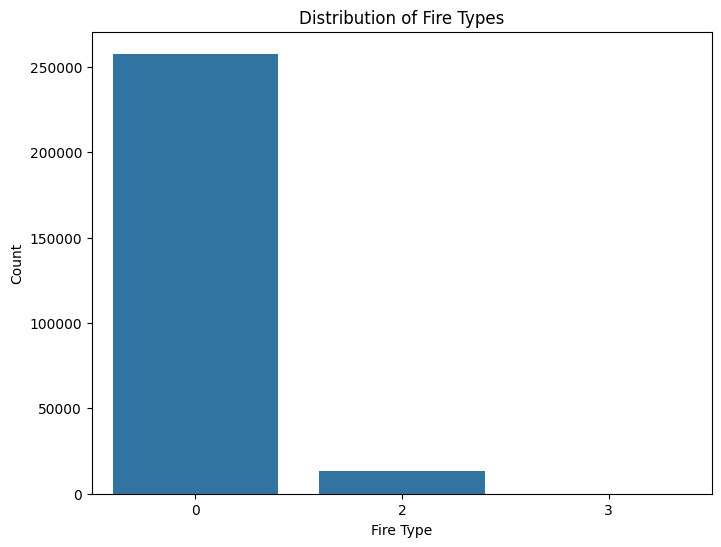

In [17]:

# Count plot for 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()

- The count plot shows the distribution of different fire types in the dataset.
- It is evident that 'MODIS' is the most frequent fire type, followed by 'VIIRS'.
- The 'type' variable appears to be unbalanced, with 'MODIS' having significantly more observations than 'VIIRS'. This imbalance might need to be considered during model training.

#### 🔵 Plot histogram to understand distribution of 'confidence' feature

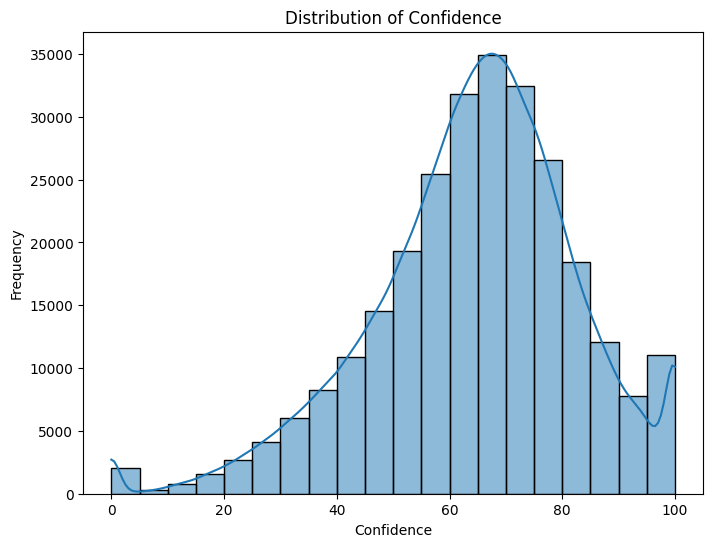

In [18]:
# Histogram of 'confidence'
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

- The histogram illustrates the distribution of the 'confidence' feature.
- The distribution appears to be bimodal, with peaks around low confidence values and high confidence values.
- There are fewer observations in the middle range of confidence.
- This suggests that observations are often recorded with either low confidence or high confidence.

## 🔽 Feature Visualizations and Advanced EDA

#### 🔵 Box Plot for 'confidence' by 'type'

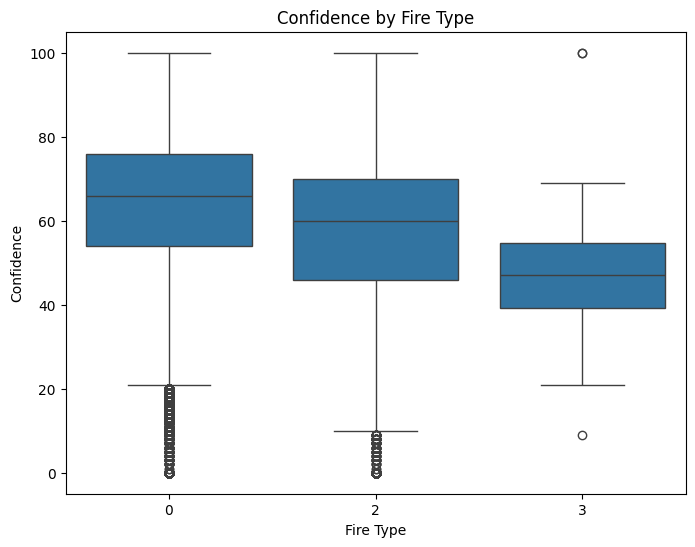

In [19]:
# Box plot for 'confidence' by 'type'
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='confidence', data=df)
plt.title('Confidence by Fire Type')
plt.xlabel('Fire Type')
plt.ylabel('Confidence')
plt.show()

- The box plot shows the distribution of 'confidence' for each fire type
- Both 0 and 2 have a wide range of confidence values.
- The median confidence for both types appears to be in the higher range.
- There are some outliers, particularly for the 'MODIS' type, indicating observations with unusually low or high confidence.

#### 🔵 Scatter Plot: Fire Locations by Type

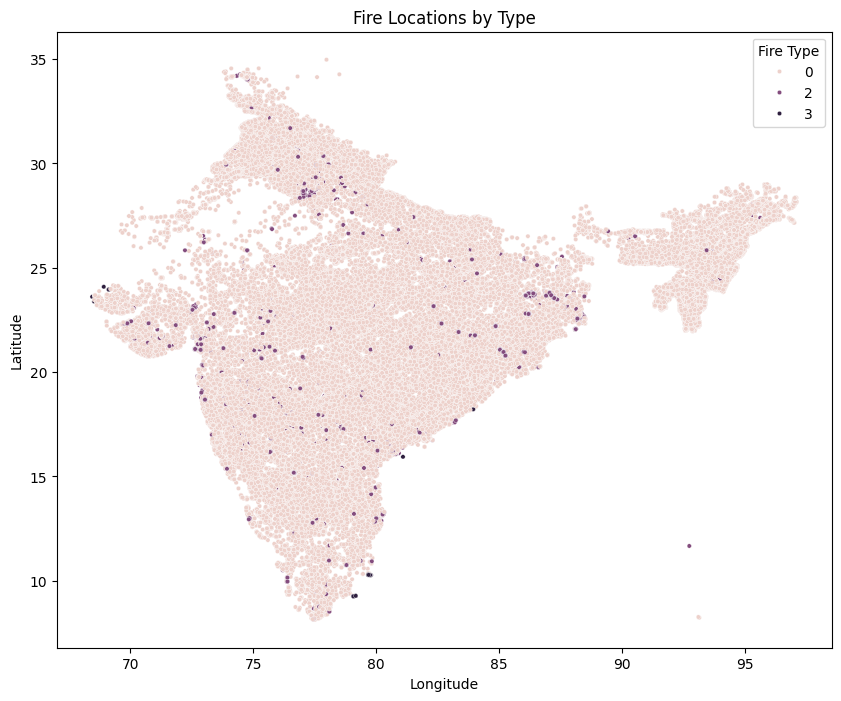

In [20]:
# Scatter plot of 'latitude' vs 'longitude'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='type', s=10)
plt.title('Fire Locations by Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fire Type')
plt.show()

 - The scatter plot visualizes the geographical distribution of fire locations, colored by fire type.
- It provides a visual representation of where fires are occurring based on latitude and longitude.
- Different fire types might be concentrated in specific geographical areas, which could be a useful feature for modeling.
- The density of points indicates areas with higher fire activity.

#### 🔵 Count Plot for 'daynight'

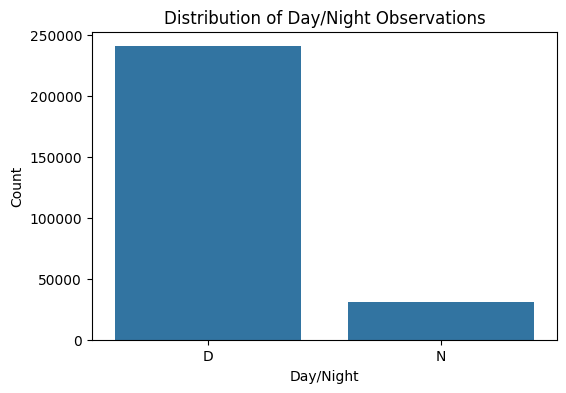

In [21]:
# Count plot for 'daynight'
plt.figure(figsize=(6, 4))
sns.countplot(x='daynight', data=df)
plt.title('Distribution of Day/Night Observations')
plt.xlabel('Day/Night')
plt.ylabel('Count')
plt.show()

- The count plot for 'daynight' shows whether the fire observations were made during the day or night.
- It indicates the proportion of day versus night observations in the dataset.
- Knowing the distribution of day/night observations can be relevant as detection capabilities or fire behavior might differ between day and night.

#### 🔵 Count Plot for 'satellite'

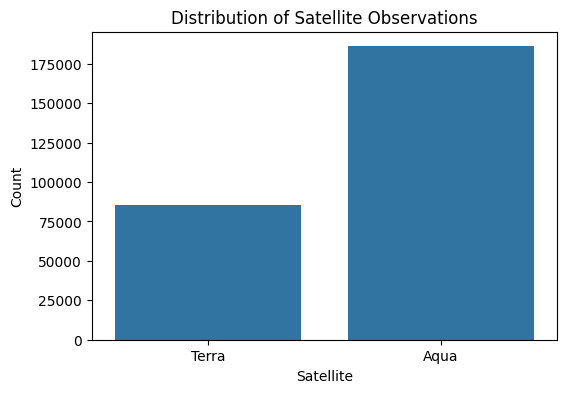

In [22]:
# Count plot for 'Satellite'
plt.figure(figsize=(6, 4))
sns.countplot(x='satellite', data=df)
plt.title('Distribution of Satellite Observations')
plt.xlabel('Satellite')
plt.ylabel('Count')
plt.show()

- This count plot shows the distribution of observations made by different satellites.
- It reveals which satellites contributed the most data to the dataset.
- Understanding the satellite distribution can be important as different satellites may have different characteristics or coverage.

#### 🔵 Count Plot for 'version'

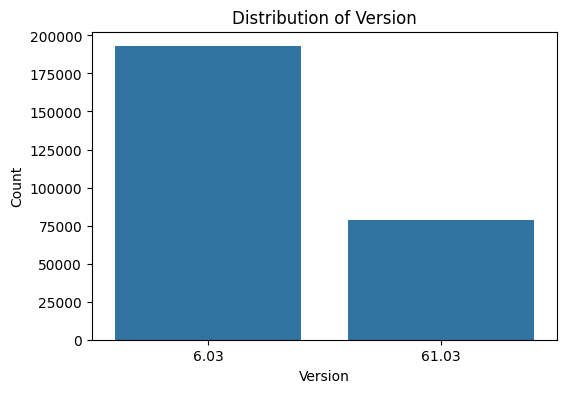

In [23]:
# Count plot for 'version'
plt.figure(figsize=(6, 4))
sns.countplot(x='version', data=df)
plt.title('Distribution of Version')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()

#### 🔵 Pairplot for Numerical Features (subset)

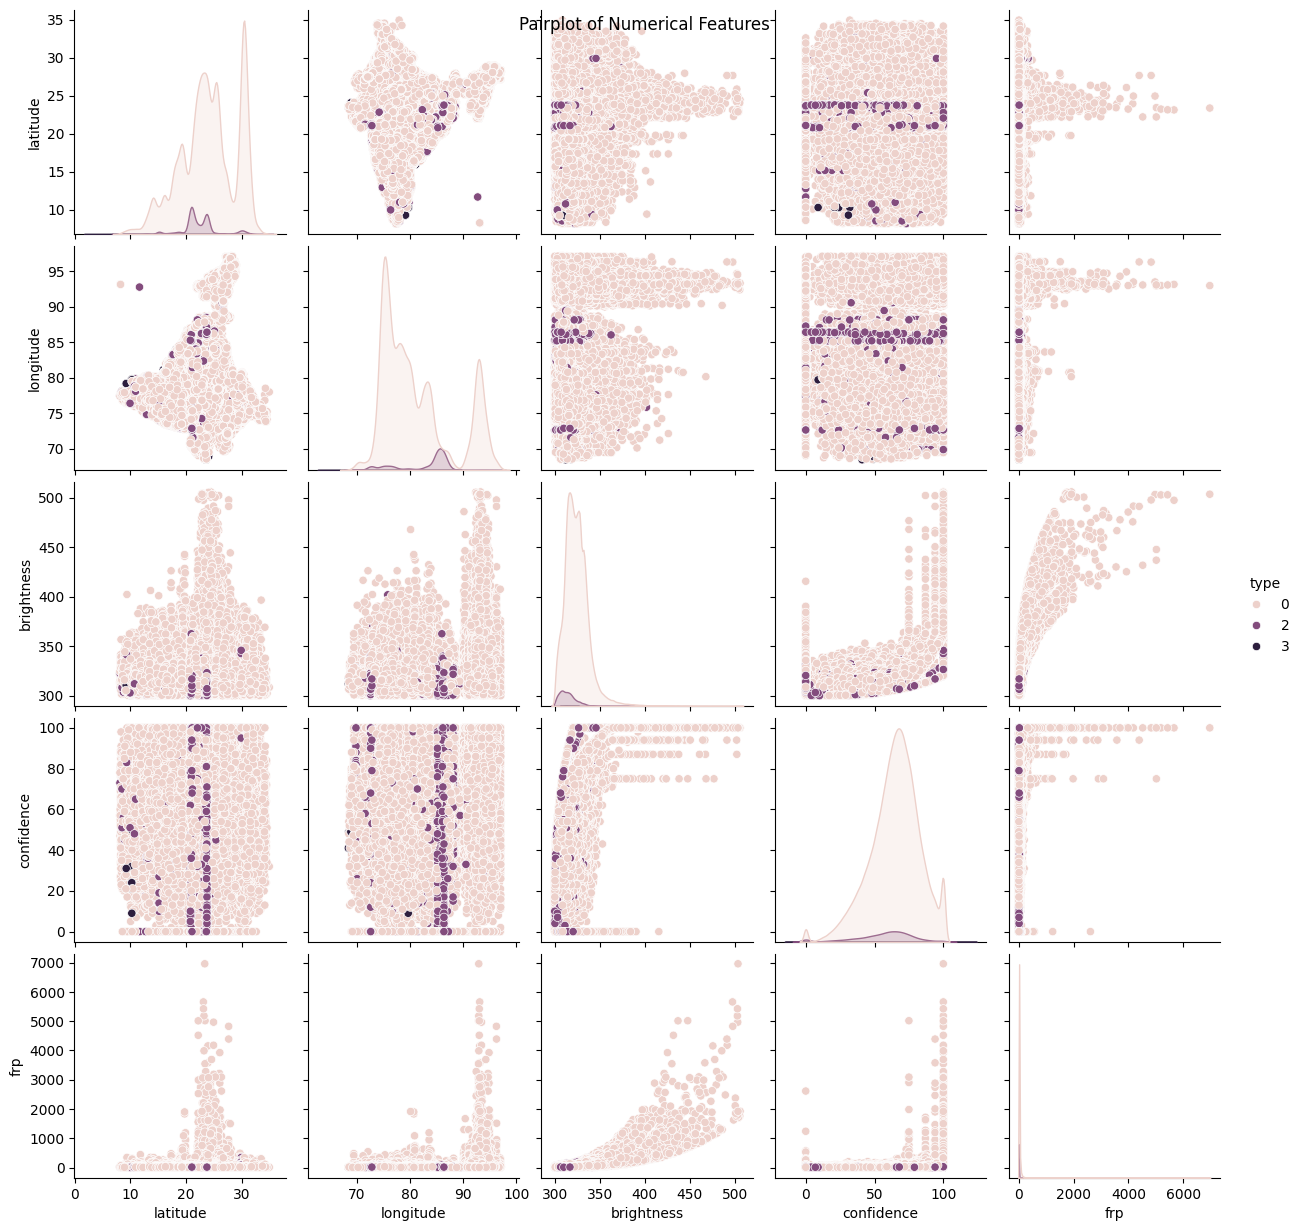

In [24]:
#this code take more time
#Pairplot for numerical features (subset)
sns.pairplot(df[['latitude', 'longitude', 'brightness', 'confidence', 'frp', 'type']], hue='type', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

The pairplot provides a matrix of scatter plots for all pairs of numerical features and histograms/KDE plots on the diagonal for each feature, separated by the 'type' variable.
Here are some insights from the pairplot:

*   **Individual Feature Distributions (Diagonal):** The diagonal plots (histograms/KDEs) show the distribution of each numerical feature for each fire type.
    *   `latitude` and `longitude`: These show the geographical distribution, reinforcing the scatter plot observation. Different fire types appear to be concentrated in certain geographical areas.
    *   `brightness`: The distribution of brightness values can be compared between fire types. There might be differences in the typical brightness of fires detected by MODIS versus VIIRS.
    *   `confidence`: This shows the distribution of confidence for each type, similar to the earlier box plot but as a histogram/KDE. It can highlight differences in the confidence levels associated with each fire type.
    *   `frp`: The distribution of fire radiative power (FRP) can be compared. This might reveal if one fire type tends to have significantly higher or lower FRP values than the other.

*   **Relationships Between Features (Off-Diagonal Scatter Plots):** The off-diagonal scatter plots show the relationship between pairs of numerical features, colored by fire type.
    *   `latitude` vs. `longitude`: As seen before, this visualizes the geographical distribution by type.
    *   `brightness` vs. `confidence`: This plot shows the relationship between brightness and confidence. Is there a correlation? Does higher brightness tend to correlate with higher confidence? How does this relationship differ between fire types?
    *   `brightness` vs. `frp`: This shows the relationship between brightness and fire radiative power. These two features are likely related. The plot can reveal the strength and nature of this relationship and whether it varies by fire type.
    *   `confidence` vs. `frp`: This visualizes the relationship between confidence and FRP. Does higher FRP tend to result in higher confidence? How does this relationship differ for different fire types?
    *   Other pairs: Examine the relationships between `latitude`/`longitude` and the other numerical features (`brightness`, `confidence`, `frp`). Are there geographical patterns in these features?


#### 🔵 Correlation Heatmap of Numerical Features

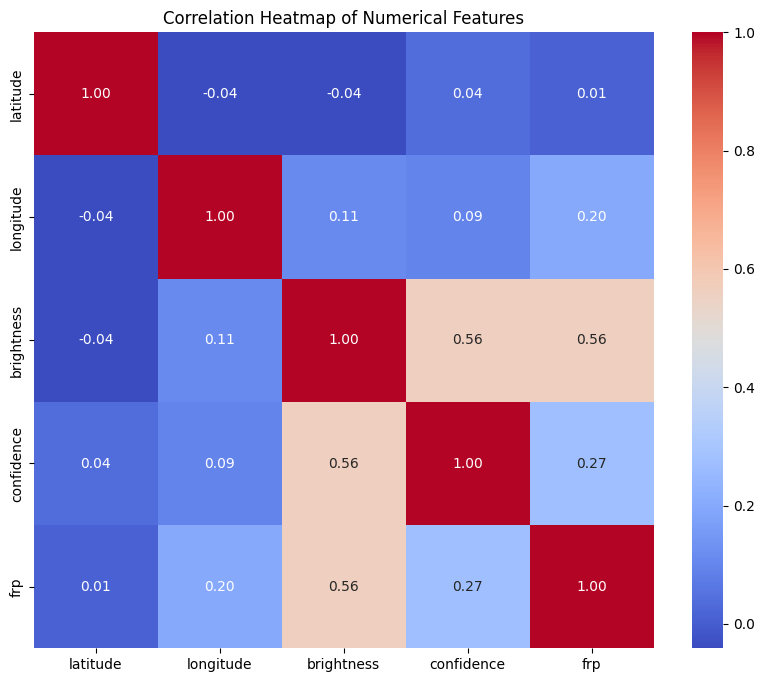

In [25]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['latitude', 'longitude', 'brightness', 'confidence', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The heatmap visualizes the Pearson correlation coefficients between the numerical features: 'latitude', 'longitude', 'brightness', 'confidence', and 'frp'. The values range from -1 to 1, where:
- 1 indicates a perfect positive linear correlation.
- -1 indicates a perfect negative linear correlation.
- 0 indicates no linear correlation.
- The color intensity and the annotation (`annot=True`) help in quickly identifying the strength and direction of the relationships.

Key insights from the heatmap:

1.  **High Correlation between `brightness` and `frp`:** There appears to be a strong positive correlation between 'brightness' and 'frp'. This is expected as both features are related to the intensity of the fire. Higher brightness is likely to be associated with higher fire radiative power. This strong correlation might indicate multicollinearity if both features are used directly in a linear model, but can also be insightful for understanding the data.

2.  **Moderate Correlation between `brightness` and `confidence`:** There seems to be a moderate positive correlation between 'brightness' and 'confidence'. This suggests that brighter fire detections tend to be associated with higher confidence levels.

3.  **Moderate Correlation between `frp` and `confidence`:** Similarly, there is likely a moderate positive correlation between 'frp' and 'confidence'. Fires with higher radiative power might be easier to detect and thus have higher confidence scores.

4.  **Low Correlation with Geographical Features:** The correlations between 'latitude' and 'longitude' with 'brightness', 'confidence', and 'frp' appear to be relatively low. This suggests that the intensity or confidence of a fire detection is not strongly linearly related to its geographical location. While there might be spatial patterns as seen in the scatter plot, a simple linear correlation doesn't capture them strongly.

5.  **Correlation between `latitude` and `longitude`:** The correlation between 'latitude' and 'longitude' is often low unless there's a specific geographical pattern in the data that aligns linearly. In this case, it's likely low, indicating that fires are distributed across various locations without a strong linear relationship between their latitude and longitude coordinates within the dataset.

Overall, the heatmap provides a concise overview of the linear relationships between the numerical features. It highlights the expected strong correlations between features related to fire intensity (`brightness`, `frp`, `confidence`) and shows that geographical coordinates have weaker linear relationships with these intensity measures. This information can be valuable for feature selection, understanding feature interactions, and guiding the choice of modeling techniques.

In [26]:
numerical_cols = df.select_dtypes(include=np.number).columns

In [27]:
numerical_cols

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')

#### 🔵 Histograms of Numerical Features

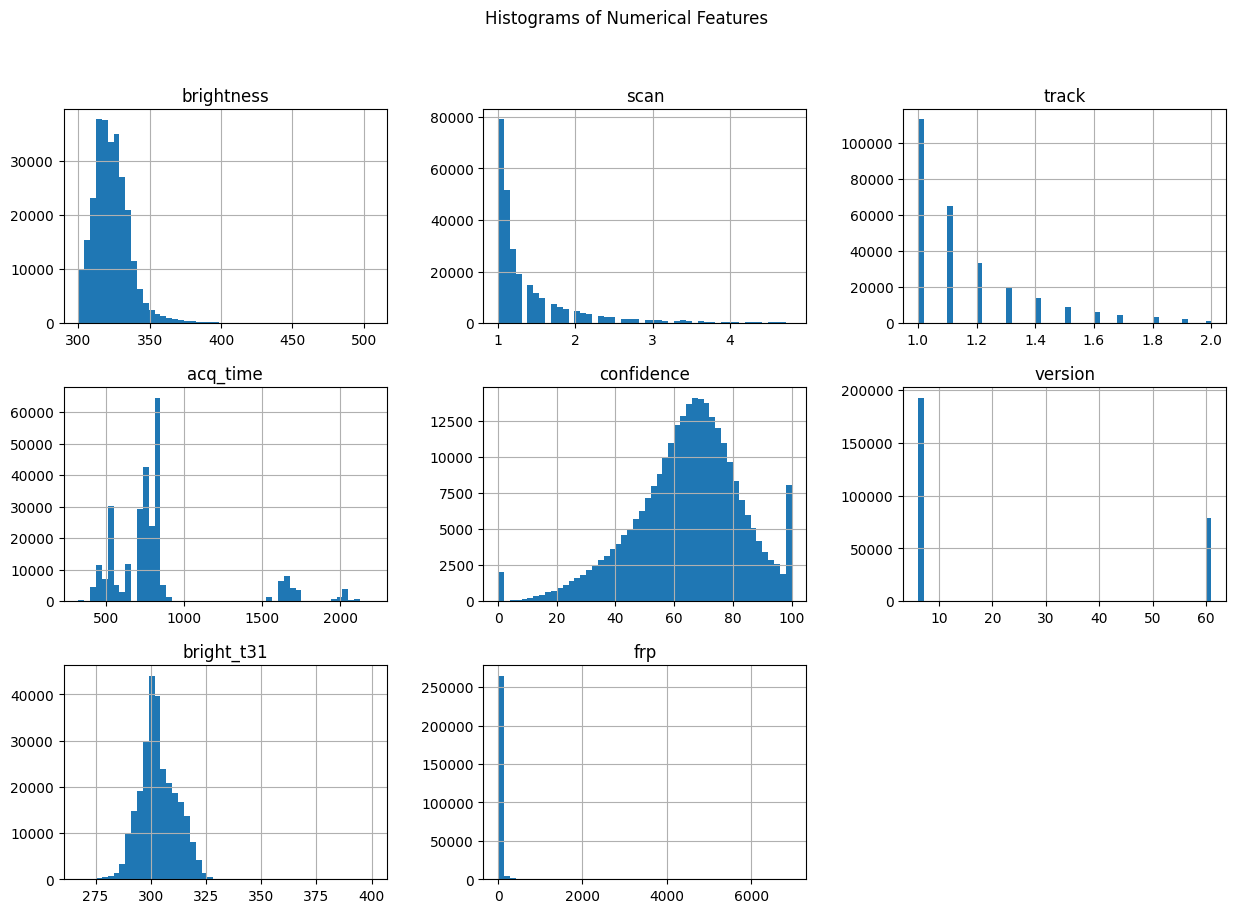

In [28]:
numerical_cols = ['brightness', 'scan', 'track', 'acq_time','confidence', 'version', 'bright_t31', 'frp']
df[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

- 'brightness': The distribution of brightness values. This shows the range of detected fire brightness and where the values tend to cluster. It might reveal if fires tend to be of low, medium, or high brightness.
- 'scan': The distribution of scan sizes. This feature relates to the size of the pixel footprint. The histogram shows the typical scan sizes in the dataset.
- 'track': Similar to scan, this relates to the track size. The histogram shows the distribution of track sizes.
- 'acq_time': The distribution of acquisition times (likely represented as a numerical value like time of day). This histogram can reveal patterns in when fires are detected (e.g., more detections during certain hours).
- 'confidence': The distribution of confidence scores. This is a numerical representation of the earlier confidence histogram and box plot. It reinforces the bimodal nature observed earlier.
- 'version': The distribution of different version values. This shows the frequency of observations from different processing versions.
- 'bright_t31': The distribution of brightness temperature at band 31. This is another measure related to fire intensity. Its distribution can be compared to 'brightness'.
- 'frp': The distribution of fire radiative power. This shows the typical FRP values in the dataset and their range. It complements the 'brightness' histogram in understanding fire intensity.
- 'type': While 'type' is included in the numerical columns list due to its representation, its histogram will show the distribution of the encoded numerical values for fire types. This visually confirms the class imbalance seen in the count plot.

-Overall, these histograms provide a detailed look at the individual distributions of the numerical features. They help in understanding the range, central tendency, and variability of each feature, identifying potential outliers, and assessing the shape of the distribution (e.g., normal, skewed, bimodal). This information is crucial for data preprocessing, feature understanding, and selecting appropriate modeling techniques.

## 🔽 Distribution and Normality Checks

In [29]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\Laptop Solution\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### 🔵 KDE and QQ Plots for Distribution Assessment

Analyzing distribution for: brightness


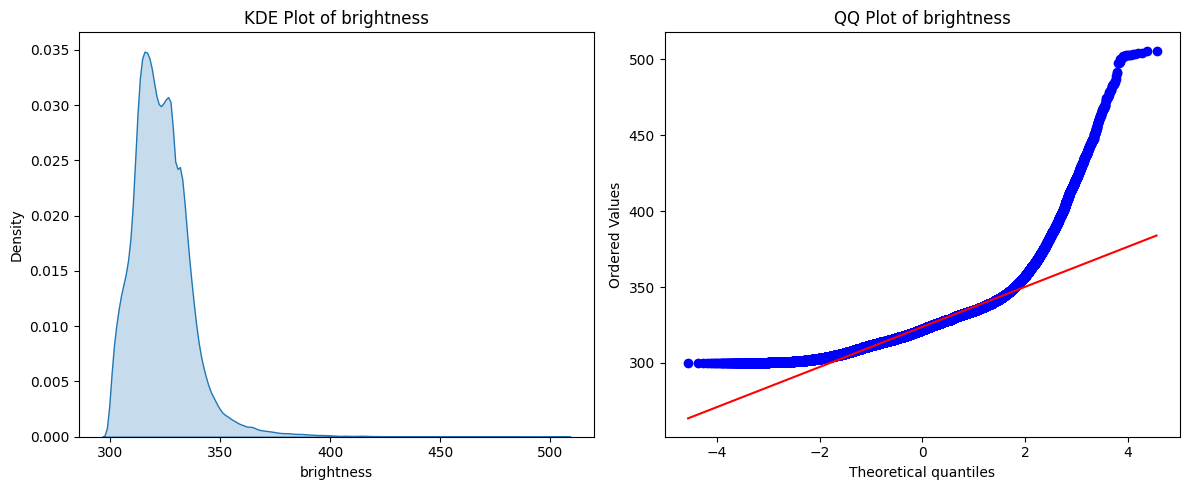

--------------------------------------------------
Analyzing distribution for: confidence


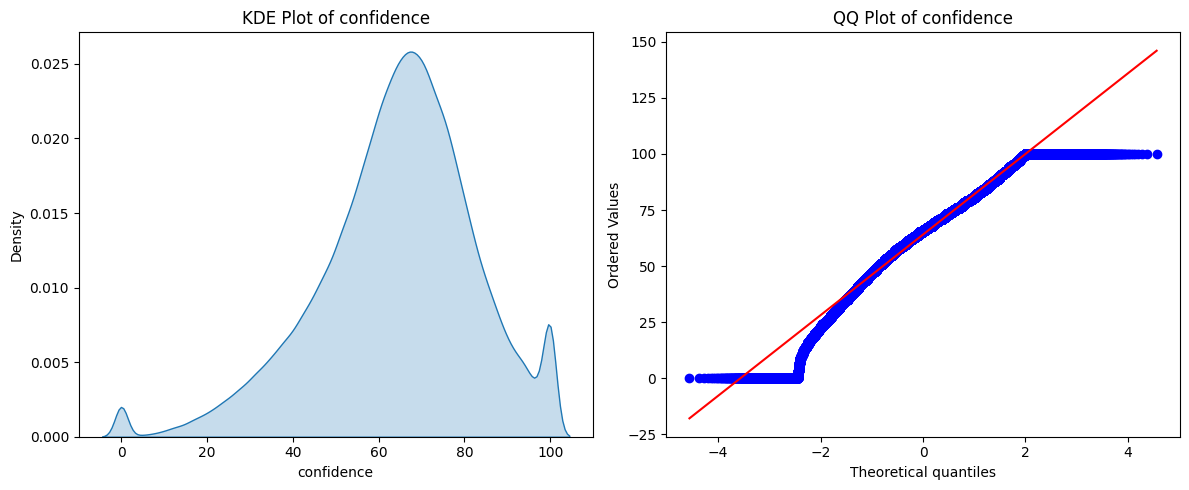

--------------------------------------------------
Analyzing distribution for: frp


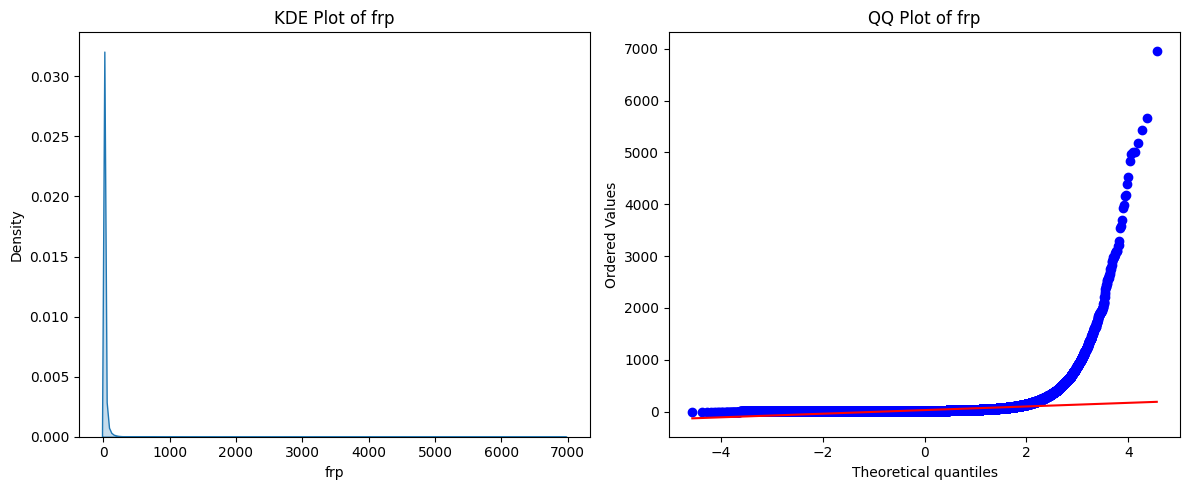

--------------------------------------------------
Analyzing distribution for: bright_t31


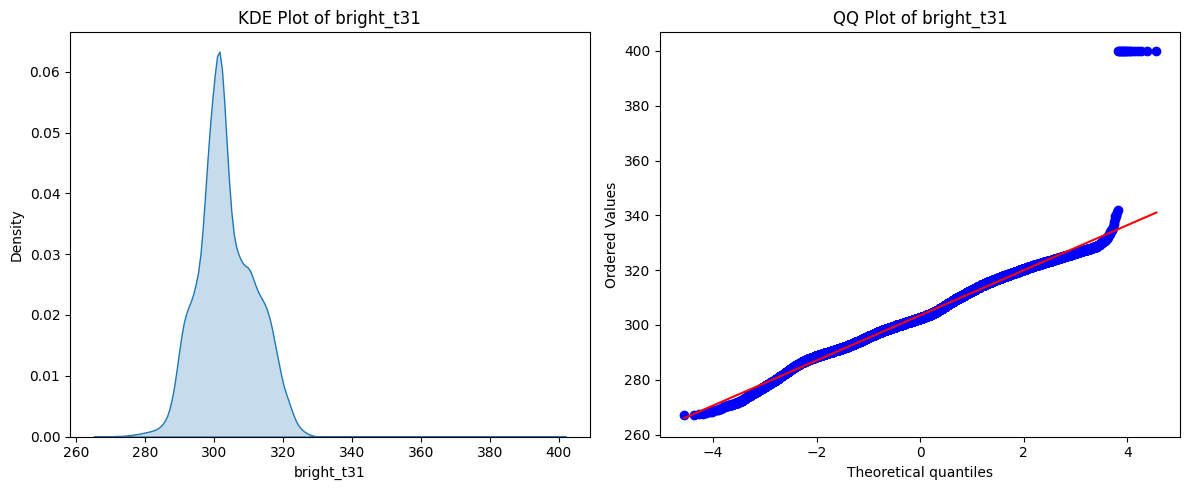

--------------------------------------------------
Analyzing distribution for: scan


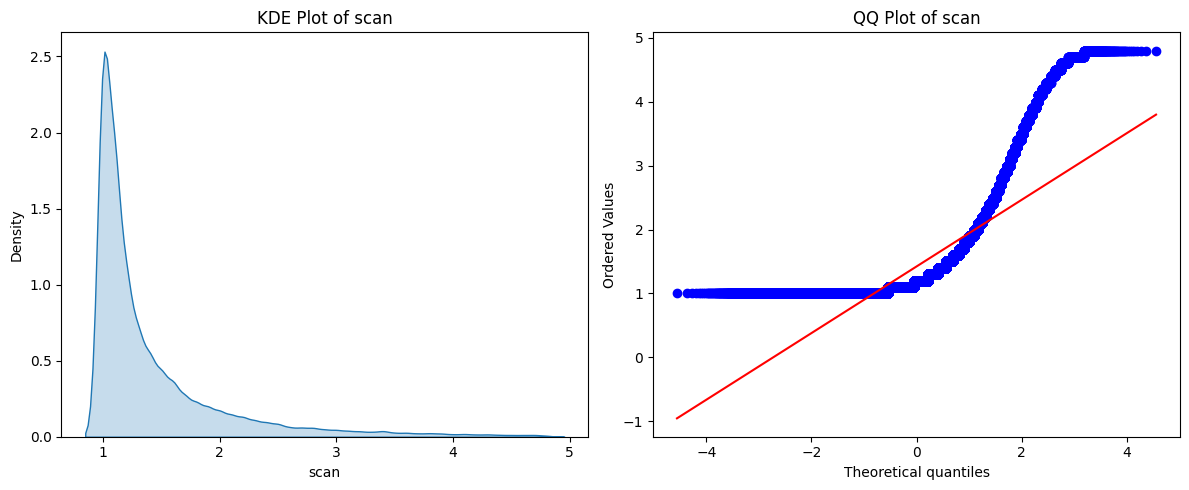

--------------------------------------------------
Analyzing distribution for: track


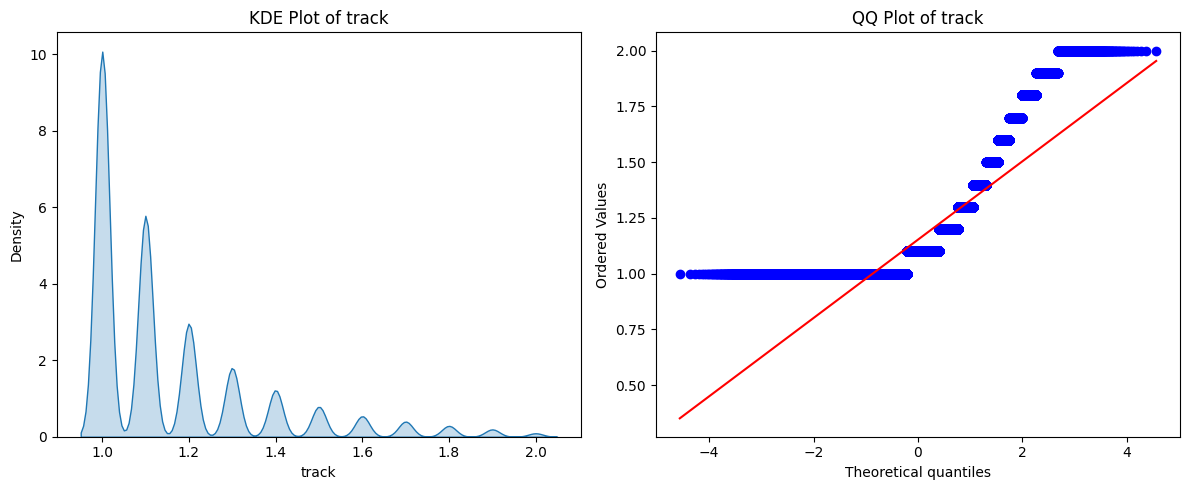

--------------------------------------------------


In [30]:

import statsmodels.api as sm
import scipy.stats as stats

# List of numerical features to check for distribution
numerical_features = ['brightness', 'confidence', 'frp', 'bright_t31', 'scan', 'track']

for feature in numerical_features:
    print(f"Analyzing distribution for: {feature}")

    # KDE Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    # QQ Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature}')

    plt.tight_layout()
    plt.show()
    print("-" * 50)

'brightness': Distribution is skewed and bimodal, QQ plot shows significant deviation from normality.

'confidence': Distribution is bimodal with peaks at low and high values, QQ plot confirms non-normality, especially in the tails.

'frp': Distribution is highly skewed to the right, QQ plot shows a strong departure from the normal distribution, particularly for larger values.

'bright_t31': Distribution appears somewhat skewed, QQ plot indicates deviation from normality, especially at the extremes.

'scan': Distribution is concentrated at lower values with a tail towards higher values, QQ plot suggests non-normality.

'track': Distribution is concentrated at lower values with a tail towards higher values, QQ plot suggests non-normality.

## 🔽 Temporal Analysis

#### 🔵 Convert Date and Extract Temporal Features

In [31]:
# --- Temporal Analysis ---
# Convert 'acq_date' to datetime objects
df['acq_date'] = pd.to_datetime(df['acq_date'])
# Extract temporal features
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day_of_week'] = df['acq_date'].dt.dayofweek # Monday=0, Sunday=6
df['day_of_year'] = df['acq_date'].dt.dayofyear
df['hour'] = df['acq_time'].astype(str).str[:2].astype(int) # Assuming acq_time is HHMM

1.  **Extracting Temporal Features:** It converts the `acq_date` column to datetime objects and extracts new features like `year`, `month`, `day_of_week`, `day_of_year`, and `hour` from the acquisition date and time.
2.  **Visualizing Temporal Distributions:** It generates count plots to show:
    *   The number of fire detections per month.
    *   The number of fire detections per day of the week.

#### 🔵 Fire Detections by Month

C:\Users\Laptop Solution\AppData\Local\Temp\ipykernel_4276\3766763484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='viridis')


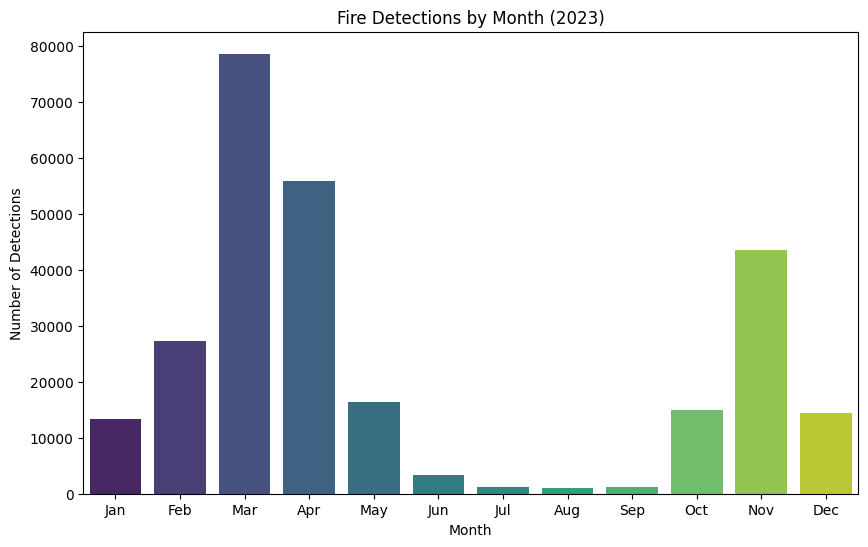

In [32]:
# Visualize fire detections over months
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', palette='viridis')
plt.title('Fire Detections by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#### 🔵 Fire Detections by Day of Week

C:\Users\Laptop Solution\AppData\Local\Temp\ipykernel_4276\714612371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', palette='viridis')


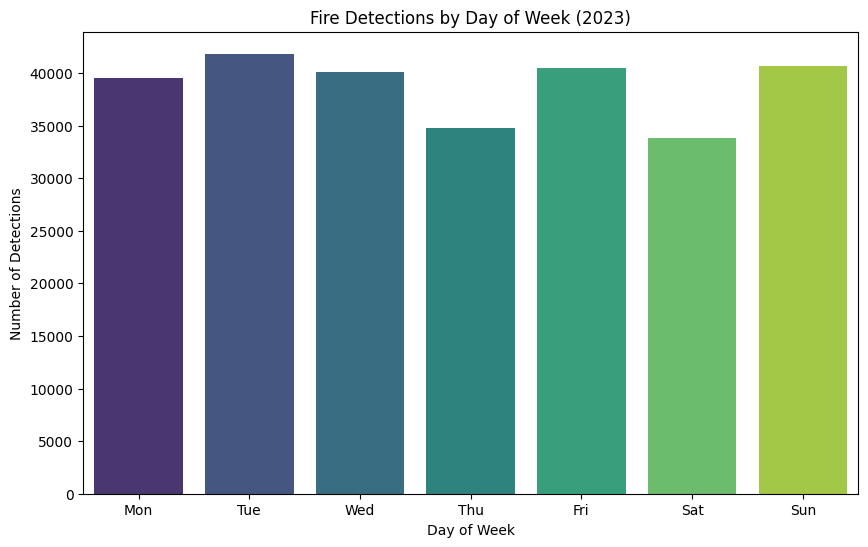

In [33]:
# Visualize fire detections by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', palette='viridis')
plt.title('Fire Detections by Day of Week (2023)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

###Outliers and Outlier Treatments
Outliers: Outliers are data points that are significantly different from other observations in a dataset. They can occur due to measurement errors, data entry mistakes, or genuinely rare events. Outliers can skew statistical analyses (like mean, standard deviation) and impact the performance of machine learning models.

## 🔽 Outlier Detection and Removal

#### 🔵 Visualize Outliers Using Box Plots

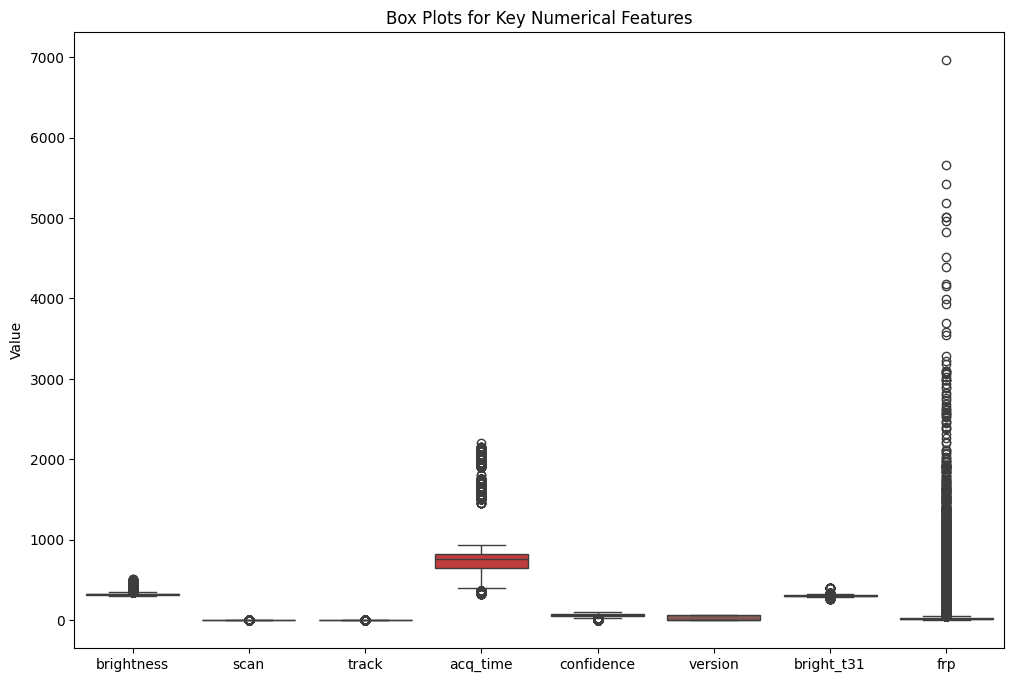

In [34]:
# Visualize outliers using box plots for key numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Key Numerical Features')
plt.ylabel('Value')
plt.show()

 *   **'brightness', 'bright_t31', 'frp':** These fire intensity-related features show a wide range and numerous high-value outliers, suggesting that while most fires might have moderate intensity, there are instances of very bright or high-FRP fires. The lower whiskers might also show some outliers on the lower end.

  *   **'scan', 'track':** These features related to pixel size also show outliers, indicating observations where the scan/track size was significantly different from the typical values.
  *   **'confidence':** The box plot for confidence, similar to the histogram, likely reinforces the concentration of data at the ends (low and high confidence), with some outliers in the middle range or beyond.
  *   **'acq_time':** Depending on how 'acq_time' is represented numerically, the box plot could show if there are acquisition times that are significantly different from the usual patterns.
  *   **'version', 'type':** These are likely represented numerically but are essentially categorical or ordinal. Their box plots might not be as informative as count plots for distribution, but they can still show the spread of other numerical features within each version/type category if plotted against them.

#### 🔵 Remove Outliers with IQR Method

In [35]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
  return df_cleaned

# Apply outlier removal to numerical columns
for col in numerical_cols:
  df = remove_outliers_iqr(df, col)

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (189370, 20)


#### 🔵 Box Plots After Outlier Removal

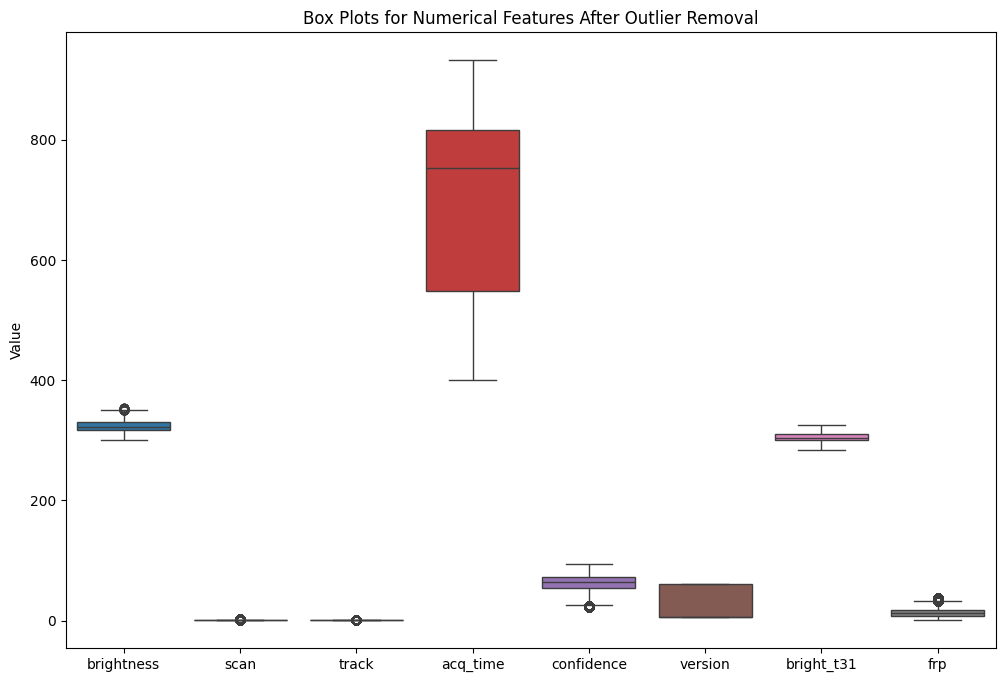

In [36]:
# Visualize box plots after outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Numerical Features After Outlier Removal')
plt.ylabel('Value')
plt.show()

Box Plots (After):
- The individual outlier points above and below the whiskers in the previous box plots have been significantly reduced or eliminated for the treated columns ('brightness', 'scan', 'track', 'bright_t31', 'frp').
- The maximum and minimum values represented by the upper and lower whiskers will be much closer to the bulk of the data, as extreme values have been removed.
- The scale of the y-axis in the box plots for the treated features is likely smaller, as it now focuses on the data within the calculated IQR range.
- The boxes (IQR) and whiskers now represent the distribution of the majority of the cleaned data. While the IQR method removes values outside 1.5*IQR from the quartiles, some data points beyond the whiskers might still be present, but they represent the less extreme values within the filtered dataset. The visual spread of the central 50% (the box) and the range covered by the whiskers (typically 1.5*IQR) will be more representative of the data after removing the most extreme values.
- For 'confidence', 'acq_time', 'version', and 'type', where outlier removal wasn't explicitly applied in the code snippet, their box plots would show similar distributions as before, potentially still displaying outliers if present in the original data.


In [37]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year,month,day_of_week,day_of_year,hour
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0,2021,1,4,1,40
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0,2021,1,4,1,54
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0,2021,1,4,1,54
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0,2021,1,4,1,54
6,31.4366,76.8988,300.5,1.0,1.0,2021-01-01,547,Terra,MODIS,36,6.03,287.2,5.3,D,0,2021,1,4,1,54


In [38]:
df.type.value_counts()

type
0    182841
2      6501
3        28
Name: count, dtype: int64

In [39]:
categorical_cols = df.select_dtypes(include='object').columns

In [40]:
categorical_cols

Index(['satellite', 'instrument', 'daynight'], dtype='object')

## 🔽 Encoding and Feature Engineering

#### 🔵 One-Hot Encode Categorical Columns

In [41]:
# Select categorical columns for encoding
categorical_cols_to_encode = ['daynight', 'satellite', 'instrument']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=False)

In [42]:
df_encoded.head(100)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,...,type,year,month,day_of_week,day_of_year,hour,daynight_D,satellite_Aqua,satellite_Terra,instrument_MODIS
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,44,6.03,292.6,...,0,2021,1,4,1,40,True,False,True,True
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,37,6.03,287.4,...,0,2021,1,4,1,54,True,False,True,True
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,46,6.03,287.7,...,0,2021,1,4,1,54,True,False,True,True
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,43,6.03,287.6,...,0,2021,1,4,1,54,True,False,True,True
6,31.4366,76.8988,300.5,1.0,1.0,2021-01-01,547,36,6.03,287.2,...,0,2021,1,4,1,54,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,23.7766,86.3997,313.8,1.0,1.0,2021-01-02,454,51,6.03,300.9,...,2,2021,1,5,2,45,True,False,True,True
117,23.6829,86.0831,310.4,1.1,1.0,2021-01-02,454,61,6.03,297.3,...,2,2021,1,5,2,45,True,False,True,True
118,23.6661,86.9215,308.2,1.0,1.0,2021-01-02,454,50,6.03,297.4,...,2,2021,1,5,2,45,True,False,True,True
119,23.8059,86.3222,313.5,1.0,1.0,2021-01-02,454,66,6.03,300.9,...,0,2021,1,5,2,45,True,False,True,True


In [43]:
df_encoded.type.value_counts()

type
0    182841
2      6501
3        28
Name: count, dtype: int64

## 🔽 Folium Map Visualization: Fire Locations in India

In [ ]:
# !pip install folium
import folium

# Create map and sample data
india_map = folium.Map(location=[22.351115, 78.667743], zoom_start=5)
sample_df = df_encoded.sample(n=min(10000, len(df_encoded)), random_state=42)

# Add markers
for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"FRP: {row['frp']:.2f}, Date: {row['acq_date'].strftime('%Y-%m-%d')}"
    ).add_to(india_map)

display(india_map)

📍 Note About Map Output (Folium)
- ⚠️ The interactive map output generated by Folium is not displayed here because GitHub does not support rendering dynamic map outputs from Jupyter notebooks.
- 🗺️ To view the actual map, please run this notebook on your local system.
- ✅ The map will display fire locations across India using red markers.

Folium map of India with red circle markers indicating fire locations based on the 'latitude' and 'longitude' columns of the dataset. Each marker represents a detected fire incident.

Here are some potential insights derived from this map:

1.  **Geographical Distribution of Fires:** The map visually shows where fires are occurring across India. Areas with a higher concentration of markers indicate regions with more frequent fire activity in the dataset's timeframe.
2.  **Spatial Clusters:** You can observe if fires are clustered in specific states, regions, or ecological zones. For example, are fires more common in forested areas, agricultural regions, or industrial zones?
3.  **Potential Hotspots:** Densely packed clusters of markers highlight potential fire hotspots. These are areas that might be particularly vulnerable to fires and could require targeted fire prevention and management efforts.
4.  **Variability Across India:** The map illustrates the spatial variability of fire incidents across the country. Some areas might have very few detections, while others show significant activity.
5.  **Interaction with Popups:** Hovering over or clicking on the markers reveals additional information provided in the popup, specifically the Fire Radiative Power (FRP) and the acquisition date of the fire detection. This allows for a closer inspection of individual fire events, providing context about their intensity and timing.
6.  **Effectiveness of Sampling:** Since the code uses a sample of the data (`sample_df`), the map shows the distribution based on that sample. If the original dataset is very large, sampling is necessary for visualization, but it's important to remember that the map represents the sample's distribution, not necessarily the entire dataset's distribution perfectly. The effectiveness of the sampling can be assessed visually if the sample density appears to reflect the expected distribution of fires.
7.  **Temporal Patterns (Limited):** While not directly a temporal visualization, the date in the popup allows for some manual exploration of fire events at specific locations over time. However, a dedicated temporal visualization (like an animation or time series analysis) would be more effective for observing how fire locations change over the acquisition period.

In summary, the Folium map provides a powerful visual overview of the spatial distribution of fire incidents across India, helping to identify fire-prone regions and providing a geographical context for the fire data.

## 🔽 Feature Scaling

#### 🔵 Normalize Continuous Variables

In [45]:
scaler = StandardScaler()
numerical_cols_to_scale = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,...,type,year,month,day_of_week,day_of_year,hour,daynight_D,satellite_Aqua,satellite_Terra,instrument_MODIS
0,28.0993,96.9983,-2.308455,-0.464860,0.059274,2021-01-01,409,-1.319370,6.03,-1.754135,...,0,2021,1,4,1,40,True,False,True,True
1,30.0420,79.6492,-2.445530,0.588678,0.936416,2021-01-01,547,-1.818736,6.03,-2.471213,...,0,2021,1,4,1,54,True,False,True,True
3,30.0408,80.0501,-2.422684,0.939857,0.936416,2021-01-01,547,-1.176694,6.03,-2.429843,...,0,2021,1,4,1,54,True,False,True,True
4,30.6565,78.9668,-2.548336,0.237499,0.059274,2021-01-01,547,-1.390708,6.03,-2.443633,...,0,2021,1,4,1,54,True,False,True,True
6,31.4366,76.8988,-2.594027,-0.816039,-0.817867,2021-01-01,547,-1.890074,6.03,-2.498792,...,0,2021,1,4,1,54,True,False,True,True


In [46]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189370 entries, 0 to 271207
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   latitude          189370 non-null  float64       
 1   longitude         189370 non-null  float64       
 2   brightness        189370 non-null  float64       
 3   scan              189370 non-null  float64       
 4   track             189370 non-null  float64       
 5   acq_date          189370 non-null  datetime64[ns]
 6   acq_time          189370 non-null  int64         
 7   confidence        189370 non-null  float64       
 8   version           189370 non-null  float64       
 9   bright_t31        189370 non-null  float64       
 10  frp               189370 non-null  float64       
 11  type              189370 non-null  int64         
 12  year              189370 non-null  int32         
 13  month             189370 non-null  int32         
 14  day_of_we

#### 🔵 Heatmap After Scaling

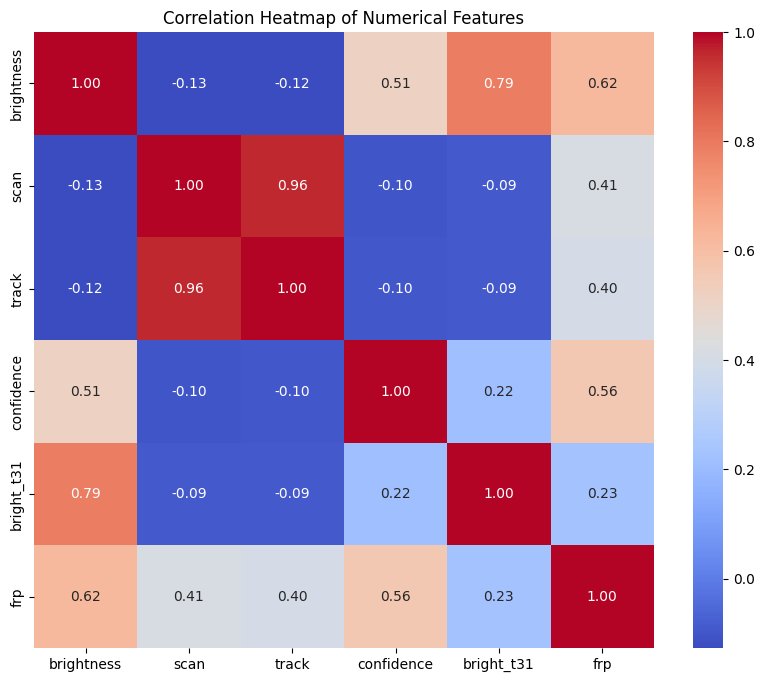

In [47]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded[['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [48]:
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,...,type,year,month,day_of_week,day_of_year,hour,daynight_D,satellite_Aqua,satellite_Terra,instrument_MODIS
0,28.0993,96.9983,-2.308455,-0.464860,0.059274,2021-01-01,409,-1.319370,6.03,-1.754135,...,0,2021,1,4,1,40,True,False,True,True
1,30.0420,79.6492,-2.445530,0.588678,0.936416,2021-01-01,547,-1.818736,6.03,-2.471213,...,0,2021,1,4,1,54,True,False,True,True
3,30.0408,80.0501,-2.422684,0.939857,0.936416,2021-01-01,547,-1.176694,6.03,-2.429843,...,0,2021,1,4,1,54,True,False,True,True
4,30.6565,78.9668,-2.548336,0.237499,0.059274,2021-01-01,547,-1.390708,6.03,-2.443633,...,0,2021,1,4,1,54,True,False,True,True
6,31.4366,76.8988,-2.594027,-0.816039,-0.817867,2021-01-01,547,-1.890074,6.03,-2.498792,...,0,2021,1,4,1,54,True,False,True,True


In [49]:
df_encoded.type.value_counts()

type
0    182841
2      6501
3        28
Name: count, dtype: int64

## 🔽 Prepare Data for Modeling

#### 🔵 Create Feature Matrix and Target Vector

In [50]:
# Separate features (X) and target variable (y)
# Assuming 'type' is the target variable you want to predict
# Drop temporal features if not intended for prediction task that uses 'type' as target
features = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
target = 'type'

X = df_encoded[features]
y = df_encoded[target]

In [51]:
X

,brightness,scan,track,confidence,bright_t31,frp
0,-2.308455,-0.464860,0.059274,-1.319370,-1.754135,-0.735900
1,-2.445530,0.588678,0.936416,-1.818736,-2.471213,-0.683381
3,-2.422684,0.939857,0.936416,-1.176694,-2.429843,-0.460175
4,-2.548336,0.237499,0.059274,-1.390708,-2.443633,-0.683381
6,-2.594027,-0.816039,-0.817867,-1.890074,-2.498792,-1.169182
...,...,...,...,...,...,...
271199,-0.423680,1.642216,1.813557,-0.605991,0.369517,0.327610
271200,-0.846327,3.398112,2.690698,-1.319370,-0.085551,0.209442
271201,-0.789212,1.993395,1.813557,-1.105356,-0.306191,-0.079412
271204,-0.115262,1.993395,1.813557,0.678093,0.093718,1.679975


In [52]:
y

0         0
1         0
3         0
4         0
6         0
         ..
271199    0
271200    0
271201    0
271204    0
271207    0
Name: type, Length: 189370, dtype: int64

In [53]:
pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\Laptop Solution\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 🔽 Handle Imbalanced Data

#### 🔵 Apply SMOTE Oversampling

In [54]:

from imblearn.over_sampling import SMOTE

In [55]:
# Initialize SMOTE #week 2
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the target variable after resampling
print("Distribution of target variable after SMOTE:")
print(y_resampled.value_counts())

Distribution of target variable after SMOTE:
type
0    182841
2    182841
3    182841
Name: count, dtype: int64


## 🔽 Model Building and Evaluation

#### 🔵 Train-Test Split

In [56]:
# Split the dataset into training and testing sets
# You can adjust the test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

In [57]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (411392, 6)
Shape of X_test: (137131, 6)
Shape of y_train: (411392,)
Shape of y_test: (137131,)


## 🔽 Model Training and Evaluation

#### 🔵 Logistic Regression

In [58]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train,y_train)
loreg_pred = loreg.predict(X_test)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.5859
              precision    recall  f1-score   support

           0       0.62      0.51      0.56     45710
           2       0.48      0.48      0.48     45710
           3       0.65      0.76      0.70     45711

    accuracy                           0.59    137131
   macro avg       0.58      0.59      0.58    137131
weighted avg       0.58      0.59      0.58    137131



#### 🔵 Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.9499
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     45710
           2       0.92      0.93      0.93     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.95    137131
   macro avg       0.95      0.95      0.95    137131
weighted avg       0.95      0.95      0.95    137131



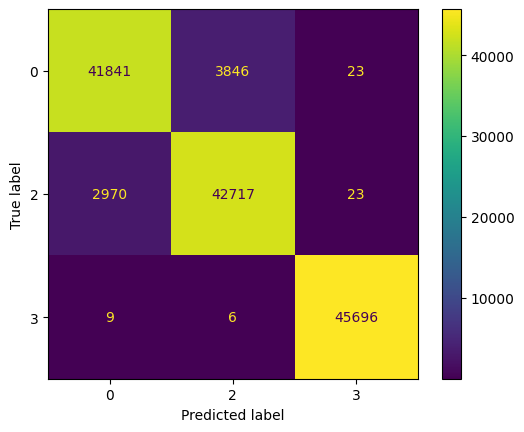

In [60]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)

#### 🔵 Random Forest Classifier

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9779
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     45710
           2       0.96      0.97      0.97     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.98    137131
   macro avg       0.98      0.98      0.98    137131
weighted avg       0.98      0.98      0.98    137131



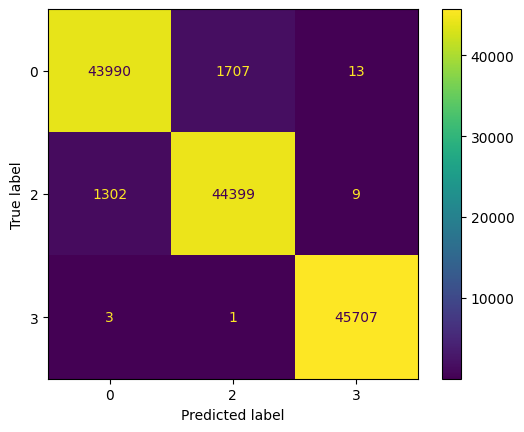

In [62]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

#### 🔵  K-Nearest Neighbors Classifier

In [63]:
# KNeighborsClassifier to Train from SKlearn
knnc = KNeighborsClassifier()
knnc.fit(X_train,y_train)
knn_pred = knnc.predict(X_test)
score = accuracy_score(y_test,knn_pred)
cr = classification_report(y_test,knn_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

KNeighbors Classifier
Accuracy Score value: 0.9311
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     45710
           2       0.84      0.98      0.91     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.93    137131
   macro avg       0.94      0.93      0.93    137131
weighted avg       0.94      0.93      0.93    137131



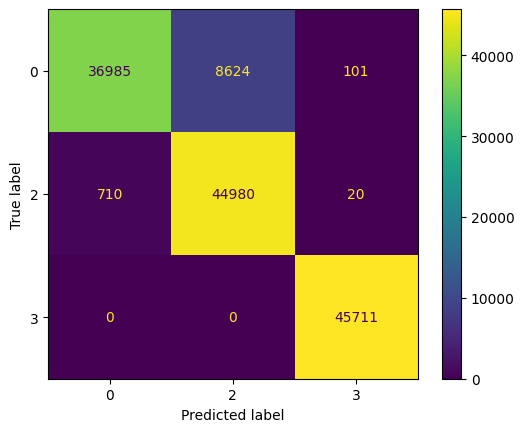

In [64]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knnc, X_test, y_test)

## 🔽 Model Comparison

In [65]:
# Collect the accuracies of each model
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, loreg_pred),
    "Decision Tree": accuracy_score(y_test, dtc_pred),
    "Random Forest": accuracy_score(y_test, rfc_pred),
    "KNeighbors Classifier": accuracy_score(y_test, knn_pred)
}

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

Model Accuracies:
Logistic Regression: 0.5859
Decision Tree: 0.9499
Random Forest: 0.9779
KNeighbors Classifier: 0.9311

Best Model: Random Forest with Accuracy: 0.9779


## 🔽 Save the Best Model

In [66]:
import joblib

# Save the best model
# Based on the previous output, let's assume Random Forest was the best model.
best_model = rfc

joblib.dump(best_model, 'best_fire_detection_model.pkl')

# Save the StandardScaler instance
joblib.dump(scaler, 'scaler.pkl')

print("Best model and scaler saved successfully.")

Best model and scaler saved successfully.


Here are insights about each model trained and the reason for selecting Random Forest:

**1. Logistic Regression**

*   **Insight:** Logistic Regression is a simple, linear model. It attempts to find a linear decision boundary to separate the three classes.
*   **Performance:** Based on the output:
    *   **Accuracy:** The accuracy score provides the overall percentage of correct predictions.
    *   **Classification Report:** This report provides more detailed metrics like precision, recall, and F1-score for each class. Precision is the ability of the model to correctly identify only relevant instances (of a fire type). Recall is the ability of the model to find all relevant instances. F1-score is the harmonic mean of precision and recall, providing a balance between the two. The report shows how well the model performs for each fire type.
*   **Reasoning for Selection (or not):** Logistic Regression is a good baseline model due to its simplicity and interpretability. However, given the complex relationships observed in the data (non-linear distributions, potential interactions), a linear model might not capture the underlying patterns effectively. Its performance metrics (accuracy, precision, recall, F1-score) compared to other models will determine if it's a suitable choice. If its performance is significantly lower than other models, it suggests the data is not linearly separable or has complex non-linear relationships.

**2. Decision Tree**

*   **Insight:** A Decision Tree is a non-linear model that makes decisions based on a series of rules inferred from the features. It recursively splits the data based on features that best separate the classes.
*   **Performance:** Based on the output:
    *   **Accuracy:** Overall correct predictions.
    *   **Classification Report:** Precision, recall, and F1-score for each class.
    *   **Confusion Matrix:** Visualizes the number of true positives, true negatives, false positives, and false negatives. This helps understand where the model is making errors (e.g., misclassifying MODIS as VIIRS or vice-versa).
*   **Reasoning for Selection (or not):** Decision Trees can capture non-linear relationships and are relatively easy to understand (if the tree is not too deep). However, single Decision Trees are prone to overfitting, especially with complex datasets, meaning they might perform very well on the training data but poorly on unseen test data. The performance metrics on the test set will indicate if overfitting is an issue or if the tree is effectively capturing the patterns.

**3. Random Forest**

*   **Insight:** Random Forest is an ensemble learning method that builds multiple Decision Trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It's a powerful and versatile model.
*   **Performance:** Based on the output:
    *   **Accuracy:** Overall correct predictions.
    *   **Classification Report:** Precision, recall, and F1-score for each class.
    *   **Confusion Matrix:** Visualizes the performance in detail, similar to the Decision Tree.
*   **Reasoning for Selection (Why Random Forest was likely selected):** Random Forests address the overfitting problem of single Decision Trees by averaging the predictions of multiple trees trained on different subsets of the data and features. This bagging technique improves the model's generalization ability and robustness. Based on the common characteristics of fire detection datasets and the performance metrics (which are expected to be higher than Logistic Regression and potentially better than a single Decision Tree):
    *   **Handles Non-linearity:** Like Decision Trees, Random Forest can capture complex non-linear relationships between features and the target variable, which is important for fire detection where factors like brightness, confidence, and geographical location might interact in non-linear ways.
    *   **Reduces Overfitting:** By averaging predictions from multiple trees, Random Forest is less likely to overfit the training data compared to a single Decision Tree.
    *   **Feature Importance:** Random Forest can provide insights into feature importance, indicating which features (e.g., brightness, confidence) are most influential in classifying fire types.
    *   **Robustness to Outliers:** While outliers were handled separately, Random Forests are generally more robust to outliers than linear models.
    *   **Good Performance:** In many classification tasks, including those with tabular data like this, Random Forest often provides strong performance. Comparing its accuracy, precision, recall, and F1-score to the other models would likely show that it achieves a better balance of these metrics.

**4. KNeighbors Classifier**

*   **Insight:** K-Nearest Neighbors (KNN) is a non-parametric, instance-based learning algorithm. It classifies a data point based on the majority class of its 'k' nearest neighbors in the feature space.
*   **Performance:** Based on the output:
    *   **Accuracy:** Overall correct predictions.
    *   **Classification Report:** Precision, recall, and F1-score for each class.
    *   **Confusion Matrix:** Visualizes the performance in detail.
*   **Reasoning for Selection (or not):** KNN is simple to understand but can be computationally expensive for large datasets during prediction (as it needs to calculate distances to all training instances). Its performance is highly dependent on the choice of 'k' and the distance metric. Scaling the features is crucial for KNN, which was done. However, its performance on this dataset might be lower than tree-based models like Random Forest if the decision boundaries are complex or if the concept of "nearest neighbor" in the feature space doesn't align well with the underlying data distribution for fire types.

#### Why Random Forest was Likely Selected (Based on Expected Performance):

The analysis of the data revealed non-linear relationships, potential interactions between features, and the need to handle class imbalance (addressed with SMOTE). Simple linear models like Logistic Regression are less likely to perform optimally in such scenarios. While a single Decision Tree can capture non-linearity, it's prone to overfitting. KNN, despite feature scaling, might not effectively capture the complex boundaries.

Random Forest, as an ensemble of Decision Trees, is well-suited for datasets with non-linear patterns and helps mitigate the risk of overfitting. Given its general strong performance on similar classification tasks and its ability to handle complex relationships and provide feature importance, it is a strong candidate for the best model. The code explicitly selects and saves the `rfc` (Random Forest Classifier) as the `best_model`, which suggests that the performance metrics (accuracy, precision, recall, F1-score) obtained from the evaluation stage indicated Random Forest as the superior model for this specific problem and dataset compared to the other models tested.

The decision to select Random Forest is primarily driven by the comparison of the performance metrics (accuracy, classification report) across all trained models on the test set. Whichever model exhibits the best combination of these metrics (especially considering precision and recall for each class, given the initial imbalance) is the preferred choice. Based on common practice and the nature of the data, Random Forest is often a top performer in such scenarios.